In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files

from google.colab import files
uploaded = files.upload()
import io
house_df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

Saving kc_house_data.csv to kc_house_data.csv


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [22]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
#Train the model
model.fit(X, y)

[5. 3.]


<Figure size 1000x600 with 0 Axes>

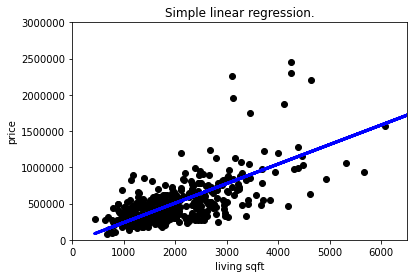

Model intercept: -32304.654721028113
Model 'a' coefficient: 269.4620546846952
Model score: 0.496708801663114


In [5]:
#b)

#Your code:
#Prepare test data (I've choosen 70:30 ratio for train:test data)
X_test = house_df.sqft_living.values.reshape(-1,1)[1001:1400]
y_test = house_df.price.values.reshape(-1)[1001:1400]
# Predict price based on the trained model
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
#Create scatter plot to show test data
ax.scatter(X_test, y_test,  color='black')
#Plot price prediction
ax.plot(X_test, y_pred, color='blue', linewidth=3)
#Turn off scientific notation
ax.ticklabel_format(useOffset=False, style='plain')

#Give name to axis
plt.ylabel('price')
plt.xlabel('living sqft')
#Limit axis range
plt.ylim(0, 3000000)
plt.xlim(0, 6500)
#Add title
plt.title("Simple linear regression.")

plt.show()
print('Model intercept:', model.intercept_)
print('Model \'a\' coefficient:', model.coef_[0])
print('Model score:', model.score(X, y))
#Model score is just below 50% which is not that great, however for linear model it's not bad. We can see that the line goes through 'the middle'
#of dots on the plot
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

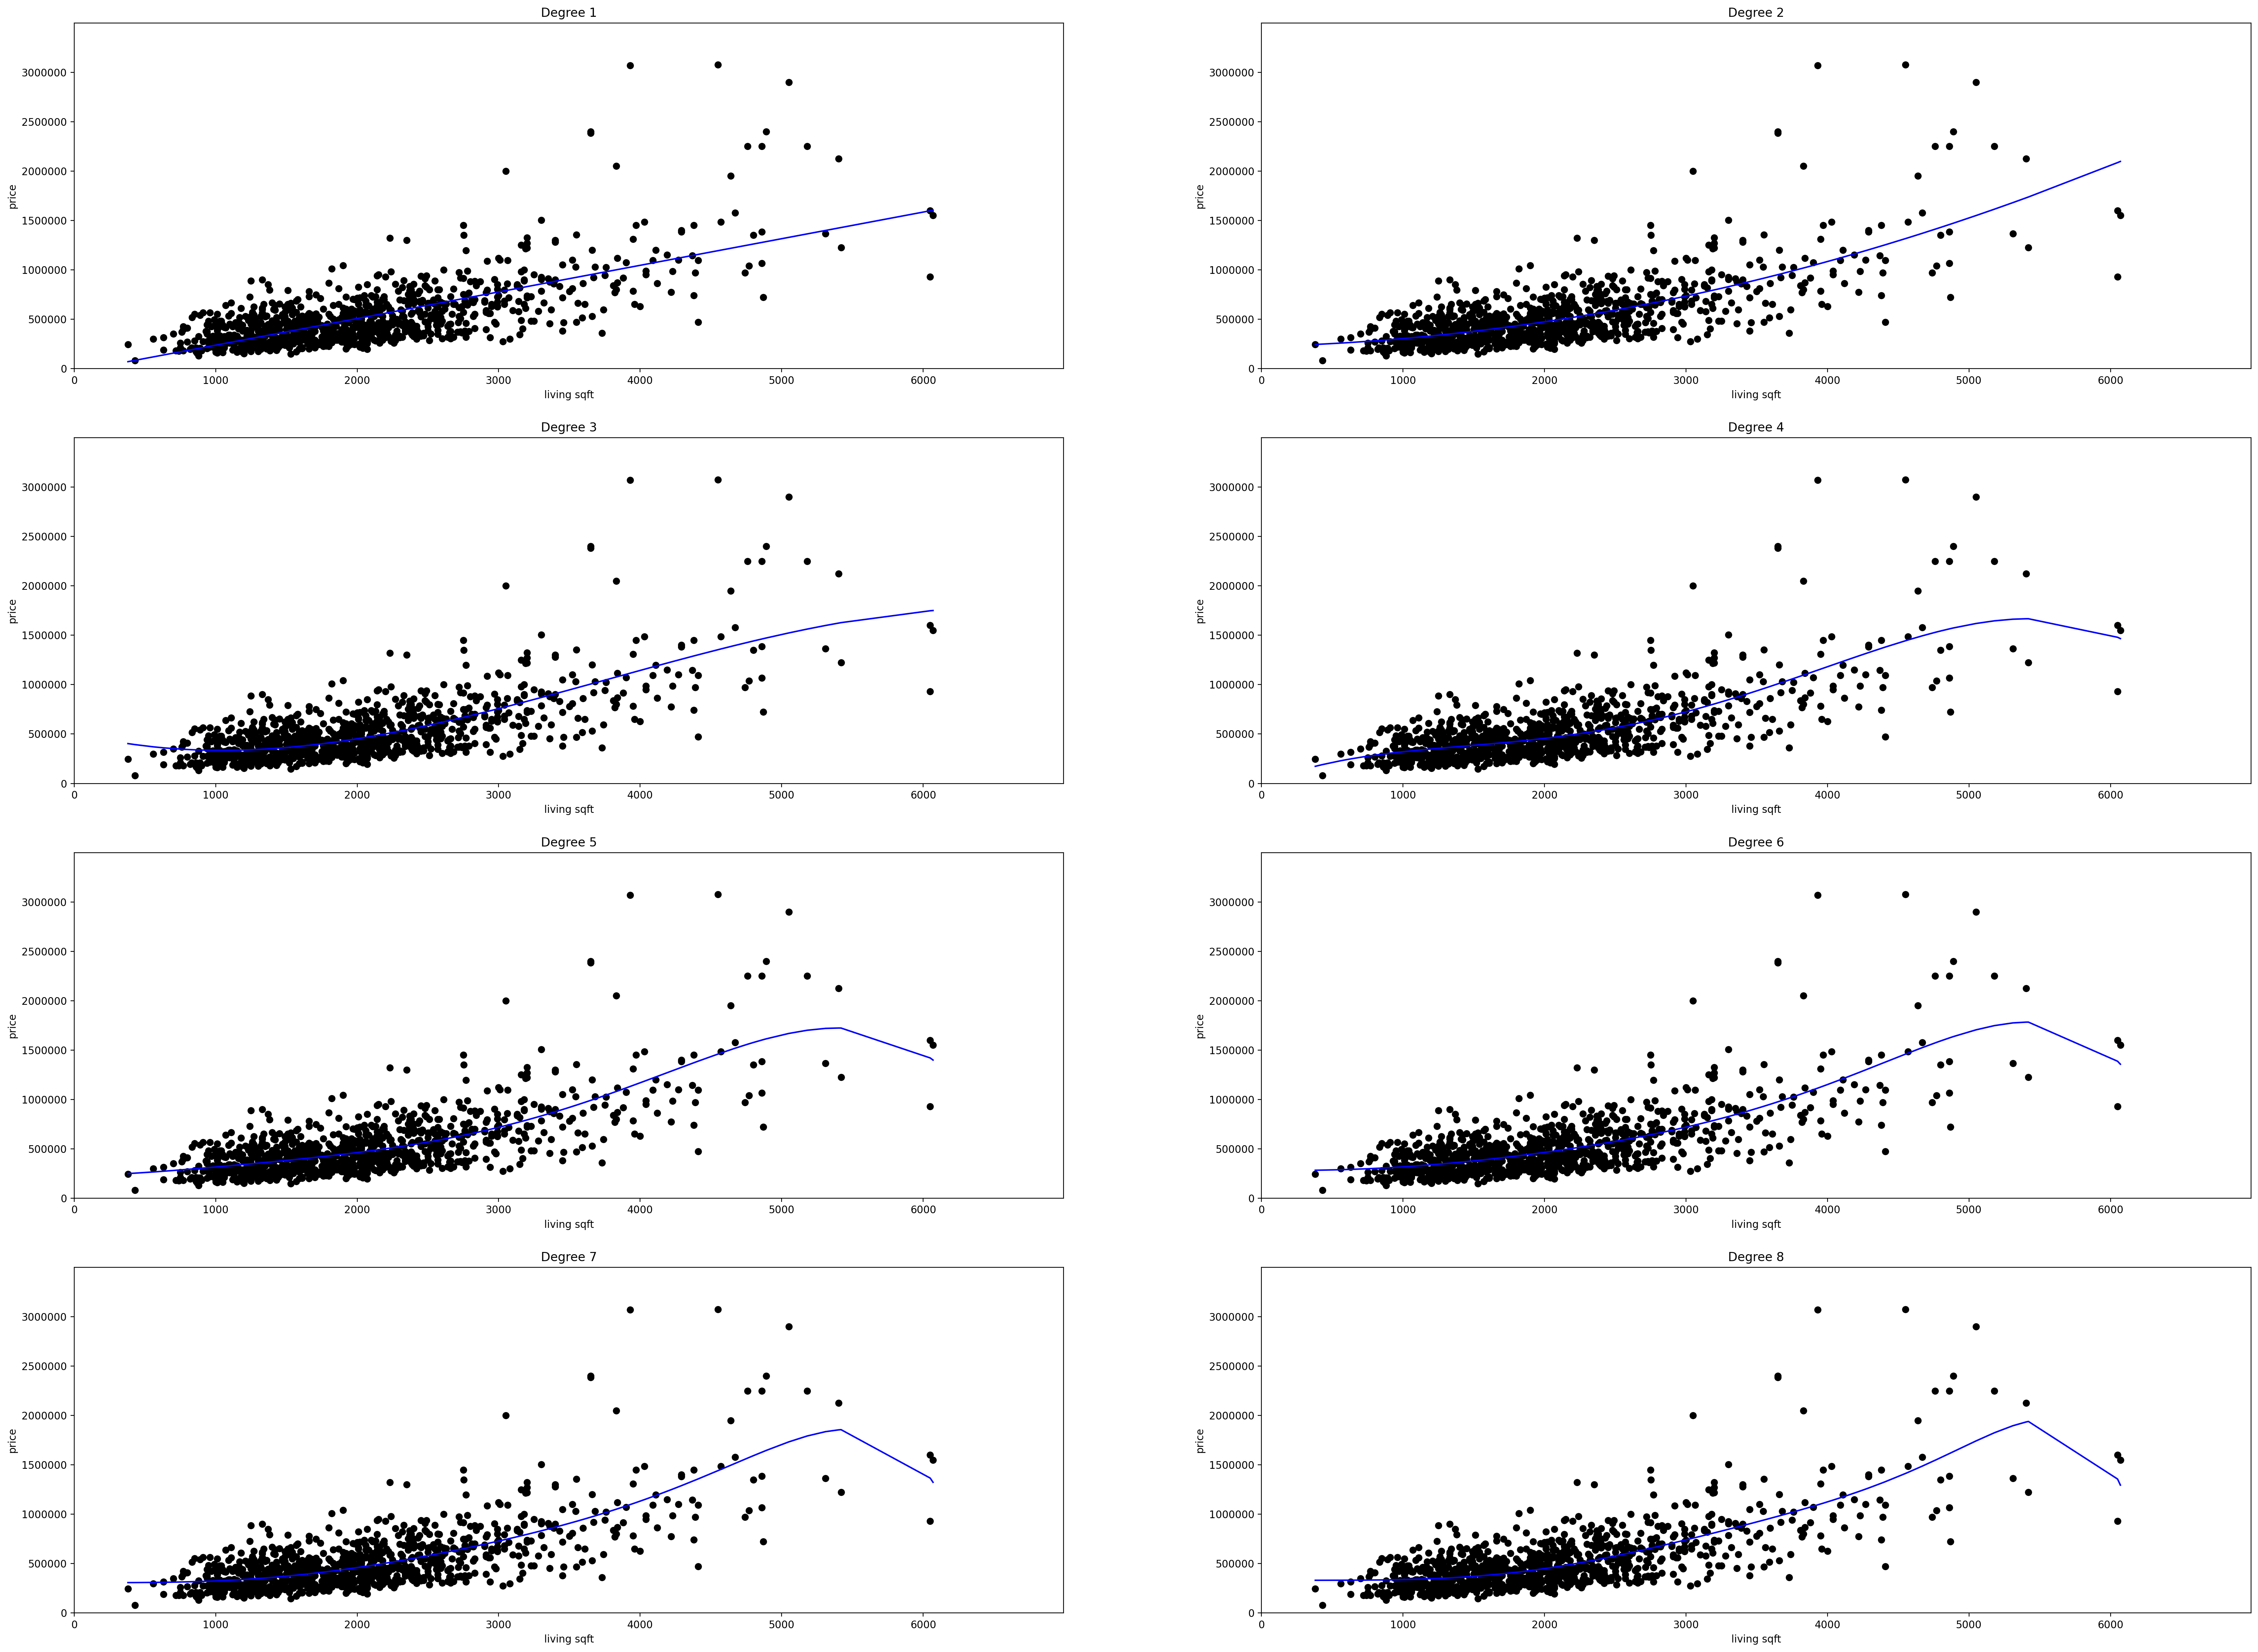

In [36]:
#c)
ax_row = 0
ax_col = 0
fig, axs = plt.subplots(4, 2)
errors = {}

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    y_order = model.predict(X_order)
    
    axs[ax_row, ax_col].scatter(X, y,  color='black')
    xs, ys = zip(*sorted(zip(X_order[:,0], y_order)))
    axs[ax_row, ax_col].plot(xs, ys, color='blue')
    axs[ax_row, ax_col].ticklabel_format(useOffset=False, style='plain')

    axs[ax_row, ax_col].set_ylabel('price')
    axs[ax_row, ax_col].set_xlabel('living sqft')
    xticks = np.arange(0, 7000, 7)
    axs[ax_row, ax_col].set_xticks = xticks
    yticks = np.arange(0, 3500000, 6)
    axs[ax_row, ax_col].set_yticks = yticks
    axs[ax_row, ax_col].set_xlim((xticks[0], xticks[-1]))
    axs[ax_row, ax_col].set_ylim((yticks[0], yticks[-1]))
    axs[ax_row, ax_col].title.set_text("Degree {}".format(order))

    errors[str(order)] = mean_squared_error(y, y_order)

    if ax_col == 1:
      ax_row += 1
    ax_col = 0 if ax_col == 1 else 1
  
plt.rcParams['figure.figsize'] = [38.4, 28.8]
plt.show()

#As we can see, higher degree polynomials are more flexible, so if data is really
#all over the plot, such polynomial will adjust.

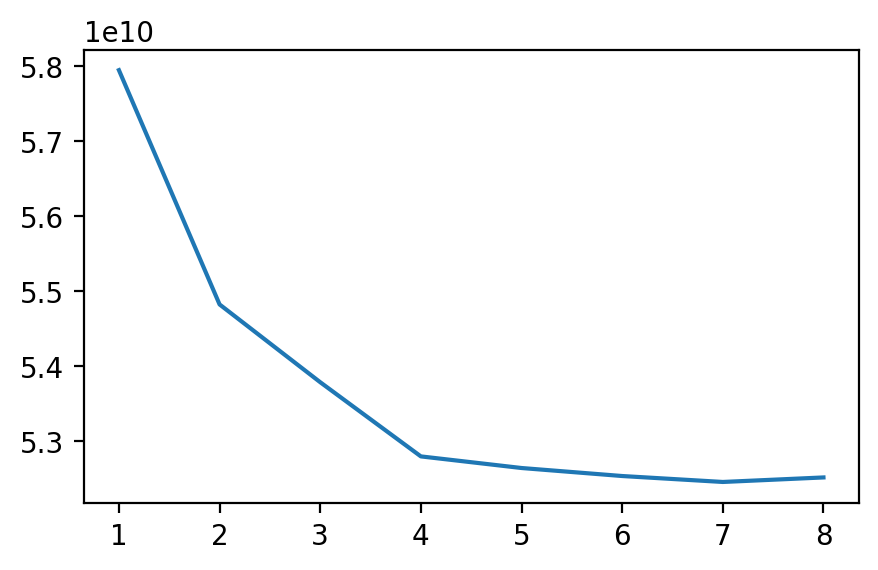

In [21]:
#Your code:
plt.rcParams['figure.figsize'] = [6.4, 4.8]
plt.plot(*zip(*sorted(errors.items())))
plt.title('Models performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.show()
#We can tell from the plot that increasing degree of polynomial to 7th degree helps our model to precisely
#predict prices. The fastest decrease in mean squared error is when we increase the degree to the 4th degree,
#from 4th to 7th there is smaller decrease. However, when increasing the degree from the 7th to the 8th, there's
#an increase in MSE, which means the degree is already too big. 

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

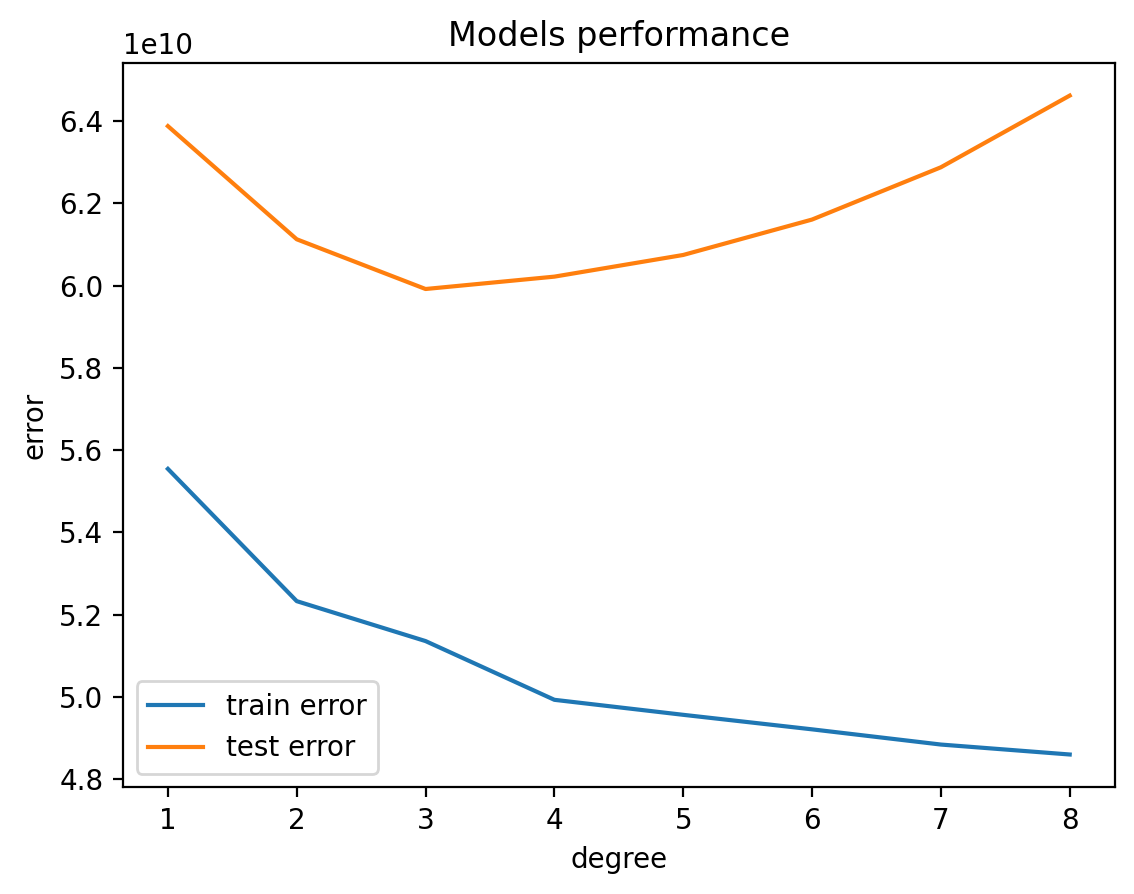

In [51]:
#a)
train_errors = {}
test_errors = {}

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model.fit(X_train, y_train)
    train_errors[str(order)] = mean_squared_error(y_train, model.predict(X_train))
    test_errors[str(order)] = mean_squared_error(y_test, model.predict(X_test))
  
plt.rcParams['figure.figsize'] = [6.4, 4.8]
plt_train_error = plt.plot(*zip(*sorted(train_errors.items())), label='train error')
plt_test_error = plt.plot(*zip(*sorted(test_errors.items())), label='test error')
plt.title('Models performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.legend(loc='lower left')
plt.show()
#Training error gets smaller with every degree, however test error gets smaller
#only until 3rd degree. For 4th and higher degrees the error gets bigger. The
#training error is smaller for every degree the model was trained, which is normal.
#With bigger degrees we can see that the difference between train error and test
#error gets bigger, which is usual when we overfit a model.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

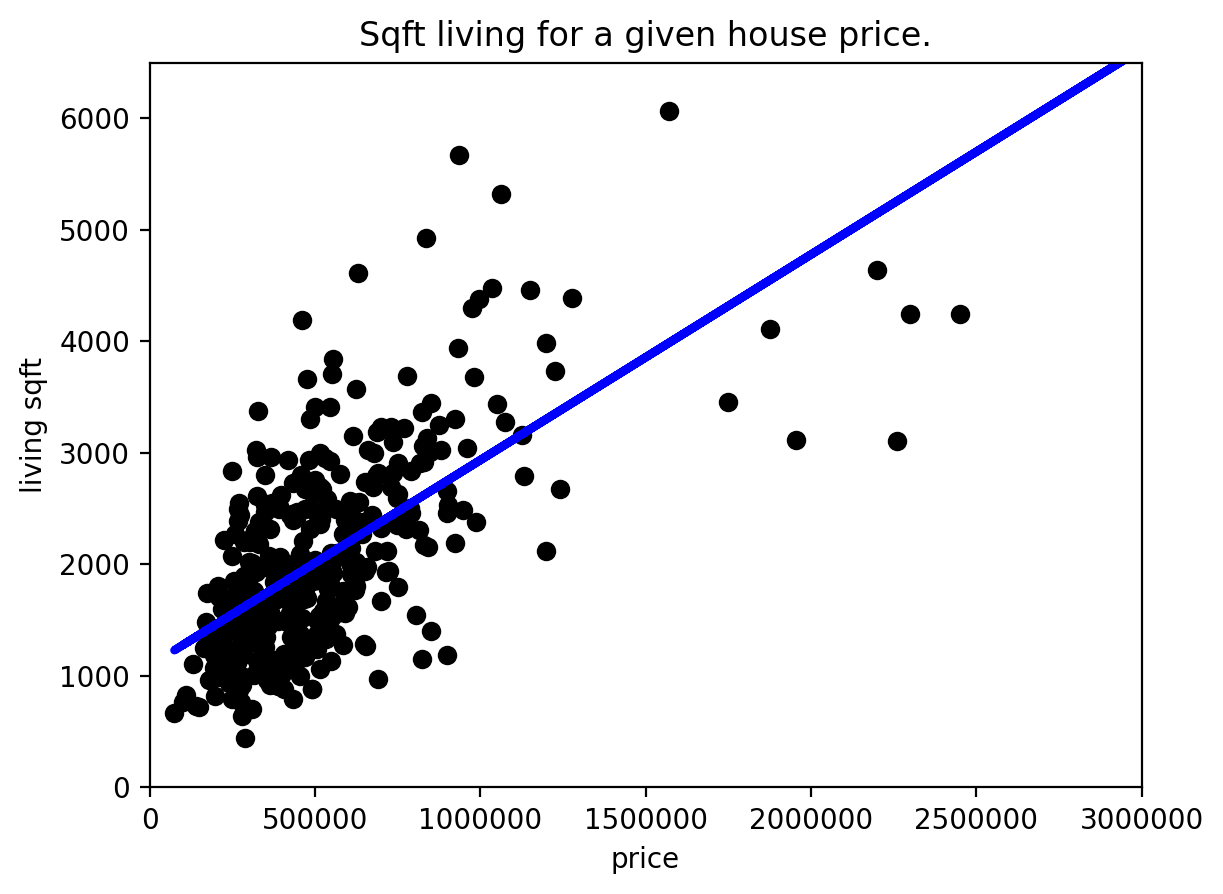

In [52]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression() 
model.fit(X, y)

X_test = house_df.price.values.reshape(-1,1)[1001:1400]
y_test = house_df.sqft_living.values.reshape(-1)[1001:1400]
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test, y_test,  color='black')
ax.plot(X_test, y_pred, color='blue', linewidth=3)
ax.ticklabel_format(useOffset=False, style='plain')

plt.ylabel('sqft_living')
plt.xlabel('price')
plt.ylim(0, 6500)
plt.xlim(0, 3000000)
plt.title("Sqft living for a given house price.")

plt.show()

#Here instead ploting price for sqft living I trained a model to predict sqft living given price.
#We can see that the scattered test data is a bit shifted because of the change of axis. Linear
#prediction function is more steep than in previous model.

In [75]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

X2 = house_df[['sqft_living', 'yr_renovated', 'yr_built', 'grade', 'view', 'bathrooms']].values.reshape(-1,6)
y2 = house_df.price.values.reshape(-1)

poly2 = PolynomialFeatures(3, include_bias = False)
X2 = poly2.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=43)
    
model2 = LinearRegression() 
_= model2.fit(X2_train, y2_train) 

y2_pred = model2.predict(X2_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y2_pred, y2_test)))

#Changing variables and reduction of test size helped the model to achieve
#smaller MSE.

Mean squared error equals: 48749267368.97092
Mean squared error equals: 42340455839.328415
